# **Support Vector Regression**

##**What is svr?**

### **Support Vector Regression(svr) is a type of support vector machine (svm) used for regression task instead of classification**

## **Load and Explore the Dataset**

In [42]:
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/Naresh312143/mahalingpur-python-ml/refs/heads/main/Salary_Data.csv')
df.head()

,Years of Experience,Salary
0,5.0,90000.0
1,3.0,65000.0
2,15.0,150000.0
3,7.0,60000.0
4,20.0,200000.0


In [43]:
df.describe()

,Years of Experience,Salary
count,6701.000000,6699.000000
mean,8.094687,115326.964771
std,6.059003,52786.183911
min,0.000000,350.000000
25%,3.000000,70000.000000
50%,7.000000,115000.000000
75%,12.000000,160000.000000
max,34.000000,250000.000000


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Years of Experience  6701 non-null   float64
 1   Salary               6699 non-null   float64
dtypes: float64(2)
memory usage: 104.9 KB


In [45]:
df.isnull().sum()

,0
Years of Experience,3
Salary,5


In [46]:
df.dropna(inplace=True)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6699 entries, 0 to 6703
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Years of Experience  6699 non-null   float64
 1   Salary               6699 non-null   float64
dtypes: float64(2)
memory usage: 157.0 KB


# **Feature Scaling(very important for SVR)**

In [48]:
from sklearn.preprocessing import StandardScaler
x = df[['Years of Experience']].values
y = df[['Salary']].values
sc_x = StandardScaler()
sc_y = StandardScaler()
x_scaled = sc_x.fit_transform(x)
y_scaled = sc_y.fit_transform(y)

## **Flatten For SVR**

In [49]:
y_scaled

array([[-0.47983873],
       [-0.95348286],
       [ 0.65690718],
       ...,
       [-1.14294051],
       [ 0.46744953],
       [-1.52185581]])

In [50]:
y_scaled=y_scaled.ravel()

In [51]:
y_scaled

array([-0.47983873, -0.95348286,  0.65690718, ..., -1.14294051,
        0.46744953, -1.52185581])

## **Train SVR Model(RBF Kernel)**

In [52]:
from sklearn.svm import SVR
svr=SVR(kernel='rbf', C=200,epsilon=0.1)
svr.fit(x_scaled,y_scaled)

SVR(C=200)

# **Predictions and invers Scaling**

In [53]:
y_pred_scaled=svr.predict(x_scaled)
y_pred=sc_y.inverse_transform(y_pred_scaled.reshape(-1,1))

In [54]:
y_pred_scaled

array([-0.45081798, -0.95953246,  1.15930222, ..., -0.72596803,
        1.02236572, -1.34890745])

In [55]:
y_pred

array([[ 91531.78013894],
       [ 64680.68849146],
       [176517.5372993 ],
       ...,
       [ 77008.74317716],
       [169289.72166366],
       [ 44128.60299039]])

## **Visualization:Actual vs Predicted**

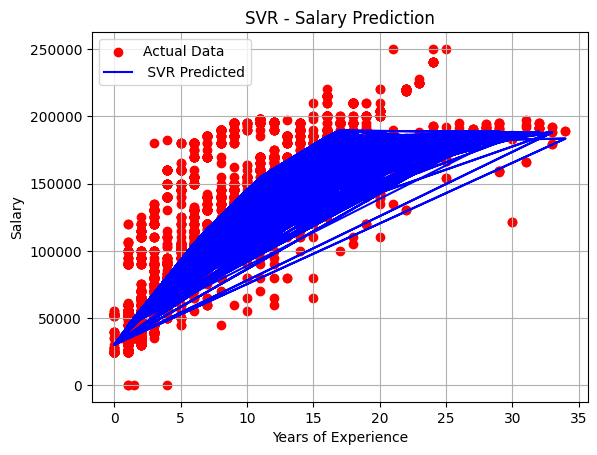

In [56]:
import matplotlib.pyplot as plt
plt.scatter(x,y,color='red',label='Actual Data')
plt.plot(x,y_pred,color='blue',label=' SVR Predicted')
plt.title('SVR - Salary Prediction')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.grid(True)
plt.legend()
plt.show()

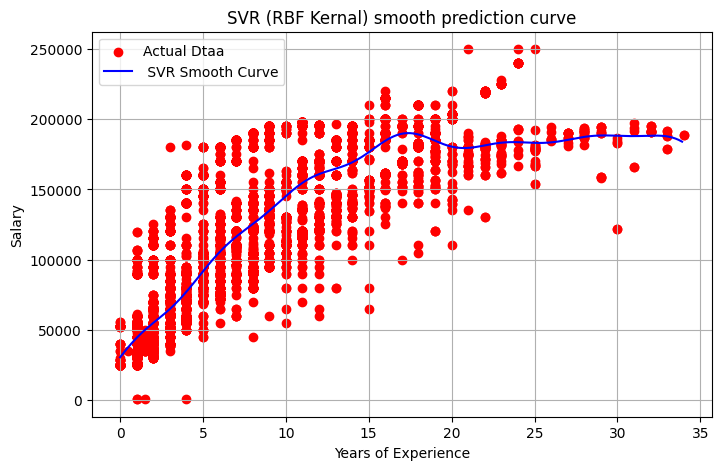

In [57]:
import numpy as np
import matplotlib.pyplot as plt
# create a fine  grid between min and max yearsExpirence
x_grid = np.arange(min(x.ravel()), max(x.ravel()), 0.1)
x_grid = x_grid.reshape(-1,1)

# scale x_grid just like training
x_grid_scaled = sc_x.transform(x_grid)

# pridicate on the grid inverse transform the result
y_grid_scaled = svr.predict(x_grid_scaled)
y_grid = sc_y.inverse_transform(y_grid_scaled.reshape(-1,1))

# Plot
plt.figure(figsize=(8,5))
plt.scatter(x,y,color='red',label='Actual Dtaa')
plt.plot(x_grid,y_grid,color='blue',label=' SVR Smooth Curve')
plt.title('SVR (RBF Kernal) smooth prediction curve')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.grid(True)
plt.legend()
plt.show()


# **Evaluate Model Performance**

In [58]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
mse=mean_squared_error(y,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y,y_pred)
print('MSE:',mse)
print('RMSE:',rmse)
print('R2:',r2)

MSE: 759133806.8749496
RMSE: 27552.382961822914
R2: 0.7275149785568982


# **Understanding  and comparing kernels**

# **Compare Kernels Using Code**

Kernel:LINEAR | R^2 Score: 0.6326


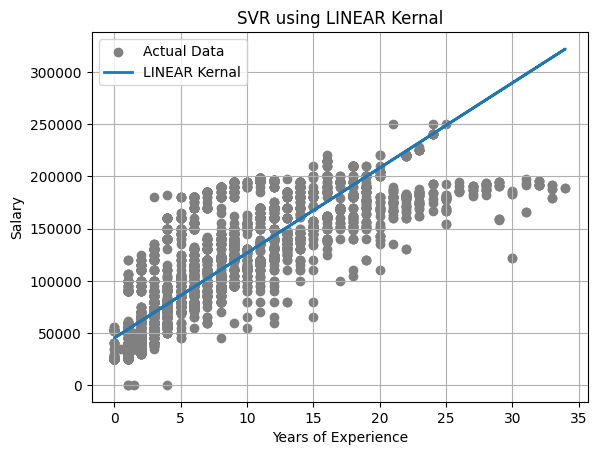

Kernel:POLY | R^2 Score: 0.0578


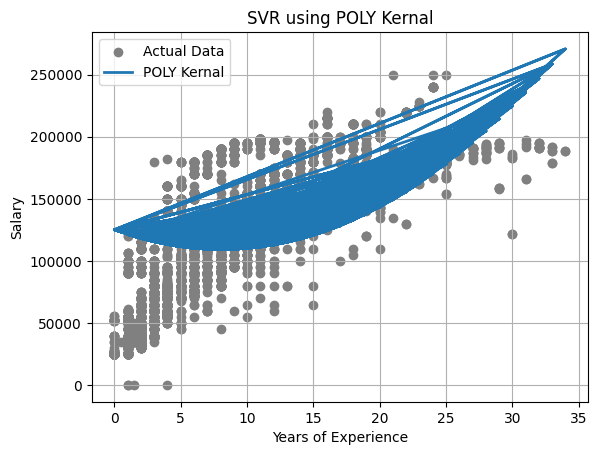

Kernel:RBF | R^2 Score: 0.7249


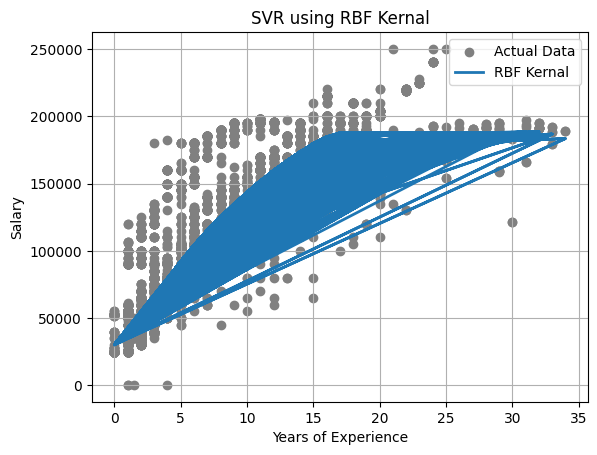

In [62]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# 1.Load and scale data
x=df[['Years of Experience']].values
y=df[['Salary']].values

sc_X=StandardScaler()
sc_y=StandardScaler()

X_scaled=sc_X.fit_transform(x)
y_scaled=sc_y.fit_transform(y).ravel() # flatten y

# 2. Define Kernels
kernels=['linear','poly','rbf']

# 3. Train and evaluate each kernel
for kernel in kernels:
  if kernel=='poly':
    model=SVR(kernel=kernel,degree=2)
  else:
    model=SVR(kernel=kernel)
  model.fit(X_scaled,y_scaled)

  # Predict for training data
  y_pred_scaled=model.predict(X_scaled)
  y_pred=sc_y.inverse_transform(y_pred_scaled.reshape(-1,1))

  # Evaluation
  score=r2_score(y,y_pred)
  print(f"Kernel:{kernel.upper()} | R^2 Score: {score:.4f}")

  #Plot
  plt.scatter(x,y,color='gray',label='Actual Data')
  plt.plot(x,y_pred,label=f'{kernel.upper()} Kernal',linewidth=2)
  plt.title(f'SVR using {kernel.upper()} Kernal')
  plt.xlabel('Years of Experience')
  plt.ylabel('Salary')
  plt.grid(True)
  plt.legend()
  plt.show()


# **Try Different C and Epsilon Values**

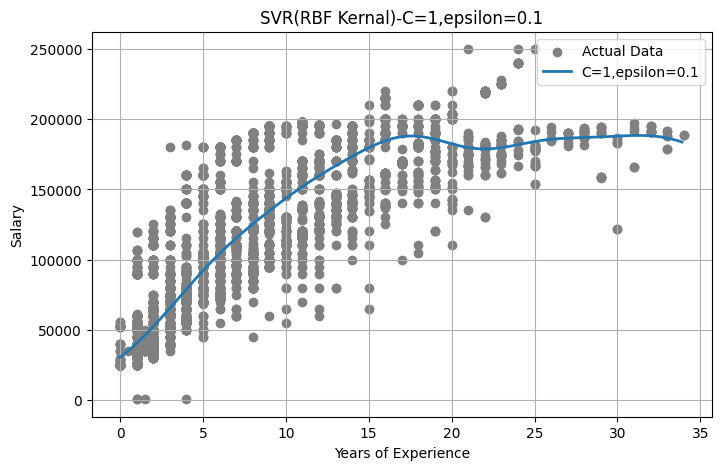

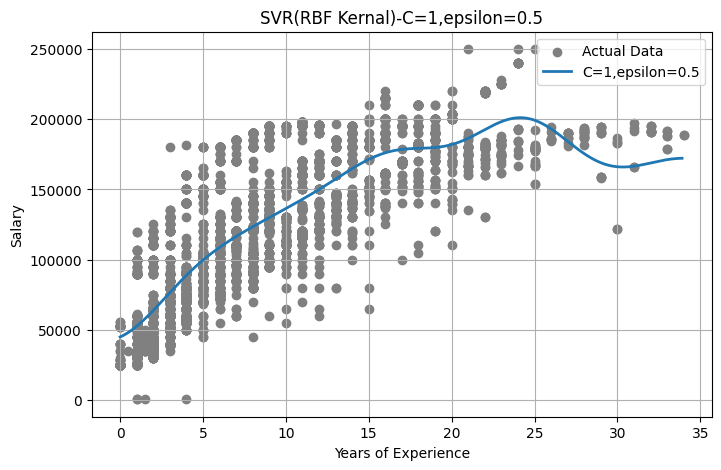

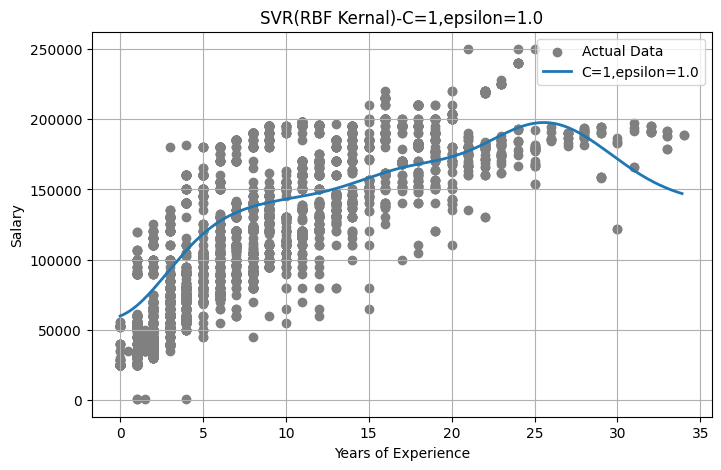

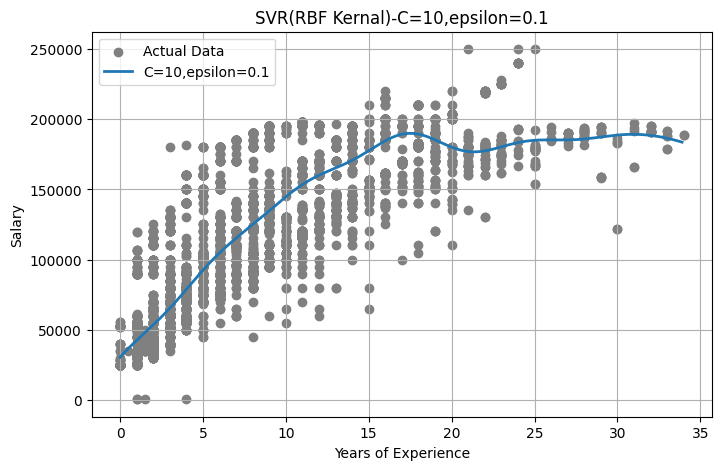

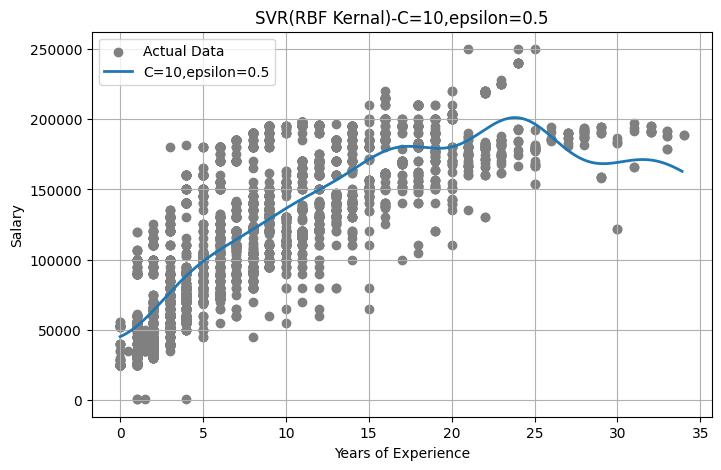

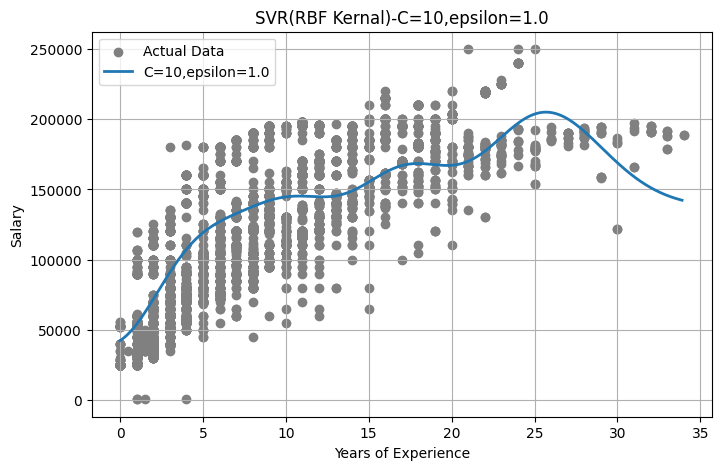

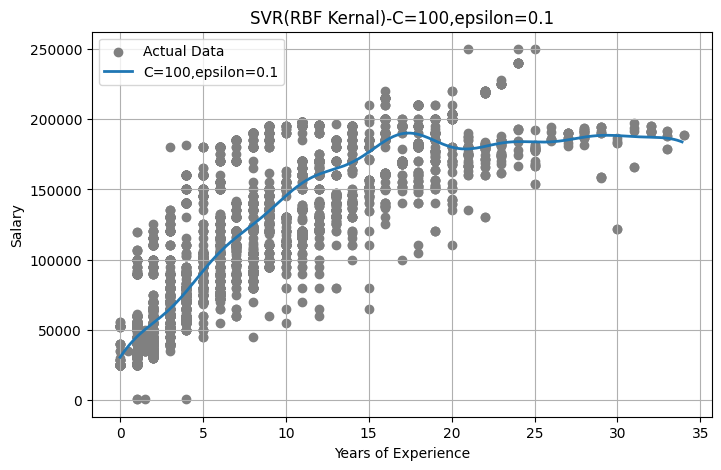

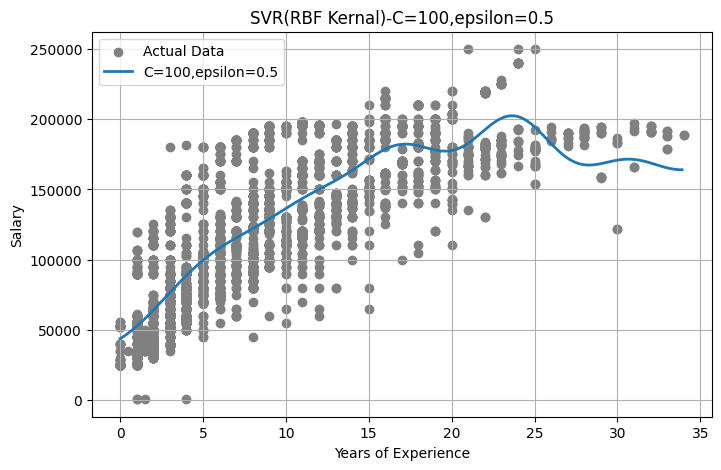

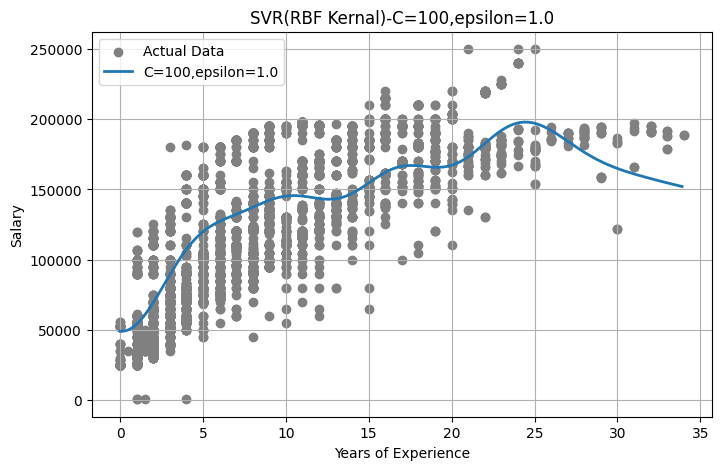

In [63]:
C_values=[1,10,100]
epsilon_values=[0.1,0.5,1.0]
x_grid=np.arange(min(x.ravel()),max(x.ravel()),0.1)
x_grid=x_grid.reshape(-1,1)
x_grid_scaled=sc_x.transform(x_grid)

for C in C_values:
  for eps in epsilon_values:
    model=SVR(kernel='rbf',C=C,epsilon=eps)
    model.fit(x_scaled,y_scaled)
    y_grid_scaled=model.predict(x_grid_scaled)
    y_grid=sc_y.inverse_transform(y_grid_scaled.reshape(-1,1))
    plt.figure(figsize=(8,5))
    plt.scatter(x,y,color='gray',label='Actual Data')
    plt.plot(x_grid,y_grid,label=f'C={C},epsilon={eps}',linewidth=2)
    plt.xlabel('Years of Experience')
    plt.ylabel('Salary')
    plt.title(f'SVR(RBF Kernal)-C={C},epsilon={eps}')
    plt.grid(True)
    plt.legend()
    plt.show()
